# **Estadística Básica**


1.   Estadística descriptiva
2.   Distribuciones de probabilidad
3.   Intérvalos de confianza






#**1. Estadística descriptiva**
La estadística descriptiva resume características importantes de los datos, a menudo con un solo número. Producir estadística descriptiva es un primer paso común después de limpiar y preparar un conjunto de datos para el análisis. 

## **Medidas de tendencia central**

Las medidas de tendencia central nos dan una idea del "medio" de una variable numérica. En otras palabras, las medidas de centralidad le dan una idea de un valor típico que esperaría ver. Las medidas comunes de tendencia central incluyen la media, la mediana y la moda.

La **media** es simplemente un promedio: la suma de los valores dividida por el número total de datos. Podemos usar `df.mean()` para obtener la media de cada columna en un DataFrame:

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mtcars = pd.read_csv("mtcars.csv")
mtcars =  mtcars.rename(columns={'Unnamed: 0': 'model'})
mtcars.index = mtcars.model
del mtcars["model"]

mtcars.head(8)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2



* mpg: 	Miles/(US) gallon 
* cyl:	Number of cylinders
* disp: 	Displacement (cu.in.)
*	hp:	Gross horsepower
* drat:	Rear axle ratio
* wt:	Weight (1000 lbs)
* qsec:	1/4 mile time
* vs:	Engine (0 = V-shaped, 1 = straight)
* am:	Transmission (0 = automatic, 1 = manual)
* gear:	Number of forward gears

In [ ]:
mtcars['mpg'].mean()                 # obtenga la media de cada columna

20.090624999999996

In [ ]:
mtcars.mean() 

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

También podemos obtener la media de cada fila proporcionando un argumento para cada eje (`mtcars.mean(axis=1)`). Recuerde que axis = 0 significa a lo largo de la columna, y axis = 1 significa a lo largo de la fila.

La **mediana** de una distribución es el valor en el que el 50 % de los datos se encuentran por debajo y el 50 % por encima. En esencia, la mediana divide los datos por la mitad. La mediana también se conoce como percentil del 50% ya que el 50% de las observaciones se encuentran debajo de ella. La mediana se puede obtener usando la función `mtcars.median()`:

In [ ]:
mtcars.median()                 # obteniendo la mediana de cada columna

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

Nuevamente, podríamos obtener las medianas de las filas en cada fila, proporcionando el argumento *axis=1*.

Aunque la media y la mediana nos dan una idea del centro de una distribución, no siempre son iguales. La mediana siempre nos da un valor que divide los datos en dos mitades, mientras que la media es un promedio numérico, por lo que los valores extremos pueden tener un impacto significativo en la media. En una distribución simétrica, la media y la mediana serán iguales. Investiguemos con un diagrama de densidad:

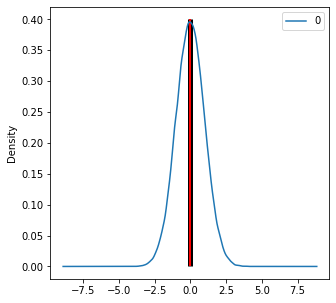

In [ ]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density", figsize=(5,5));


plt.vlines(norm_data.mean(),     # media = línea negra
           ymin=0, 
           ymax=0.4,
           linewidth=5.0);

plt.vlines(norm_data.median(),   # mediana = línea roja
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");


En el gráfico de arriba, la media y la mediana están tan cerca de cero que la línea roja de la mediana se encuentra encima de la línea negra más gruesa dibujada en la media.

En distribuciones sesgadas, la media tiende a ser jalada en la dirección del sesgo, mientras que la mediana tiende a resistir los efectos del sesgo:

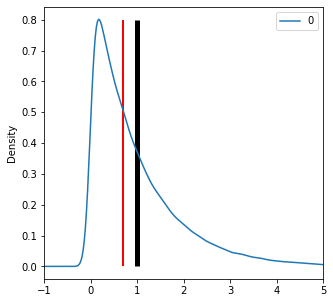

In [ ]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(5,5),
              xlim=(-1,5));


plt.vlines(skewed_data.mean(),     # media = línea negra
           ymin=0, 
           ymax=0.8,
           linewidth=5.0);

plt.vlines(skewed_data.median(),   # mediana = línea roja
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red");

La media también está fuertemente influenciada por los valores atípicos, mientras que la mediana resiste la influencia de los valores atípicos. Dado que la mediana tiende a resistir los efectos de la asimetría y los valores atípicos, se la conoce como una estadística "robusta". La mediana generalmente da una mejor idea del valor típico en una distribución con sesgos significativos o valores atípicos:

La **moda** de una variable es simplemente el valor que aparece con más frecuencia. A diferencia de la media y la mediana, se puede tomar la moda de una variable categórica y es posible tener varias modas. La moda la podemos encontrar con `mtcars.mode()`:

In [ ]:
mtcars.mode()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Las columnas con múltiples modas (múltiples valores con el mismo conteo) devuelven múltiples valores. Las columnas sin moda (ningún valor que aparezca más de una vez) devuelven NaN.

## **Medidas de dispersión (Measures of Spread)**

Las medidas de dispersión describen cómo varían los datos. Mientras que las medidas de centralidad nos dan una idea del valor típico, las medidas de dispersión nos dan una idea de cuánto tienden a divergir los datos del valor típico.

Una de las medidas más simples de dispersión es el **rango**. El rango es la distancia entre las observaciones máxima y mínima:

In [ ]:
max(mtcars["mpg"]) - min(mtcars["mpg"])

23.5

In [ ]:
max(mtcars["cyl"]) - min(mtcars["cyl"])

4

La mediana representa el percentil 50 de un conjunto de datos. 

El percentil es una medida de posición usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo

Se puede utilizar un resumen de varios percentiles para describir la dispersión de una variable. Podemos extraer el valor mínimo (percentil 0), el primer **cuartil** (percentil 25), la mediana, el tercer cuartil (percentil 75) y el valor máximo (percentil 100) usando la función `quantile()`:

In [ ]:
mtcars['mpg'].median()

19.2

In [ ]:
five_num = [mtcars["mpg"].quantile(0),   
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

Dado que estos valores se usan tan comúnmente para describir datos, se conocen como el "*resumen de cinco números*". Son los mismos valores percentiles devueltos por `df.describe()`:


In [ ]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


El rango intercuartil (IQR) es otra medida común de dispersión. IQR es la distancia entre el 3er cuartil y el 1er cuartil:

In [ ]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

Los diagramas de caja (*box plots*) son representaciones visuales del resumen de los cinco números y el IQR.

En la siguiente gráfica se muestran las diferentes partes de un box plot:

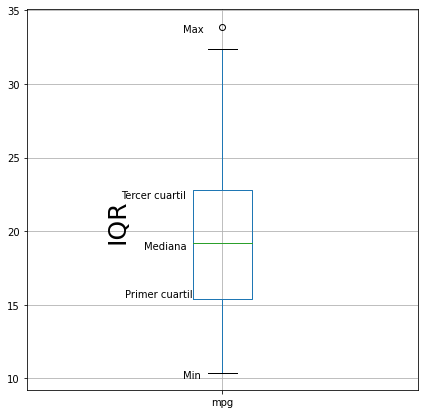

In [ ]:
mtcars.boxplot(column="mpg", 
               return_type='axes',
               figsize=(7,7))

plt.text(x=0.74, y=22.25, s="Tercer cuartil")
plt.text(x=0.8, y=18.75, s="Mediana")
plt.text(x=0.75, y=15.5, s="Primer cuartil")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25);

En esta gráfica, podemos identificar las siguiente cantidades:

* Mediana.
* Cuartil superior  $P_{75}$. 
* Cuartil inferior  $P_{25}$ 
* Rango intercuartil  $IQR = P_{75} − P_{25}$
* Extremo superior
* Extremo inferior

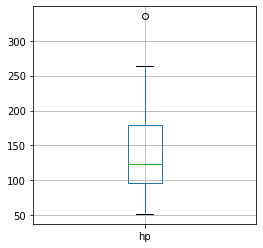

In [ ]:
mtcars.boxplot(column="hp",
               return_type='axes',
               figsize=(4,4))

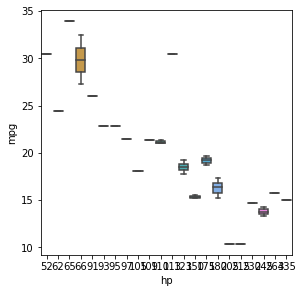

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4.5, 4.5))
#sns.boxplot(x="axis=1",y="mpg, hp", data=mtcars)
sns.boxplot(x= 'hp', y="mpg", data=mtcars)

La **varianza** y la **desviación** estándar son otras dos medidas comunes de dispersión. La varianza de una distribución es el promedio del cuadrado de la desviación de dicha variable respecto a su media. Use `df.var()` para hallar la variación:



In [ ]:
mtcars["mpg"].var()

36.32410282258065

La desviación estándar es la raíz cuadrada de la varianza. La desviación estándar puede ser más interpretable que la varianza, ya que la desviación estándar se expresa en términos de las mismas unidades que la variable en cuestión, mientras que la varianza se expresa en términos de unidades al cuadrado. Use `df.std()` para verificar la desviación estándar:


In [ ]:
mtcars["mpg"].std()

6.026948052089105

## **Sesgo y curtosis (Skewness and Kurtosis)**

Más allá de las medidas de tendencia central y dispersión, la estadística descriptiva incluye medidas que le dan una idea de la forma de una distribución. El **sesgo**, también llamado coeficiente de asimetría, y la **curtosis**, son un tipo de medición característicos de una serie de valores tanto como las medidas de tendencia central o las medidas de dispersión.

El sesgo mide la asimetría de una distribución, mientras que la curtosis mide la cantidad de datos que hay en las colas de una distribución vs el centro. No entraremos en los cálculos exactos detrás de la asimetría y la curtosis, pero son esencialmente estadísticas que llevan la idea de la varianza un paso más allá: mientras que la varianza implica elevar al cuadrado las desviaciones de la media, la asimetría implica elevar al cubo las desviaciones de la media y la curtosis implica elevar desviaciones de la media a la cuarta potencia.

Pandas ha incorporado funciones para verificar la asimetría y la curtosis, `df.skew()` y `df.kurt()` respectivamente:

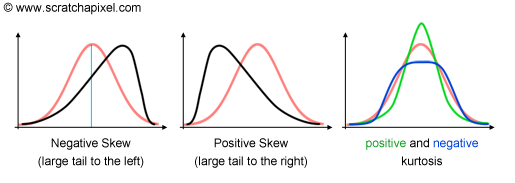

In [ ]:
mtcars["mpg"].skew()  # skewness

0.6723771376290805

In [ ]:
mtcars["mpg"].kurt()  # kurtosis

-0.0220062914240855

Para explorar más estas dos medidas, vamos a crear algunos datos ficticios:

In [ ]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

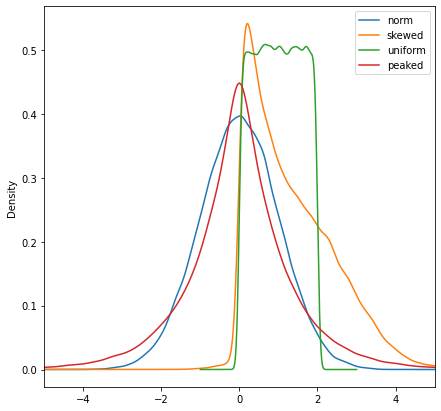

In [ ]:
data_df.plot(kind="density", figsize=(7,7), xlim=(-5,5));

Ahora vamos a comprobar la asimetría de cada una de las distribuciones. Dado que el sesgo (skewness) mide la asimetría, esperaríamos ver una asimetría baja para todas las distribuciones excepto la asimétrica, porque todas las demás son aproximadamente simétricas:


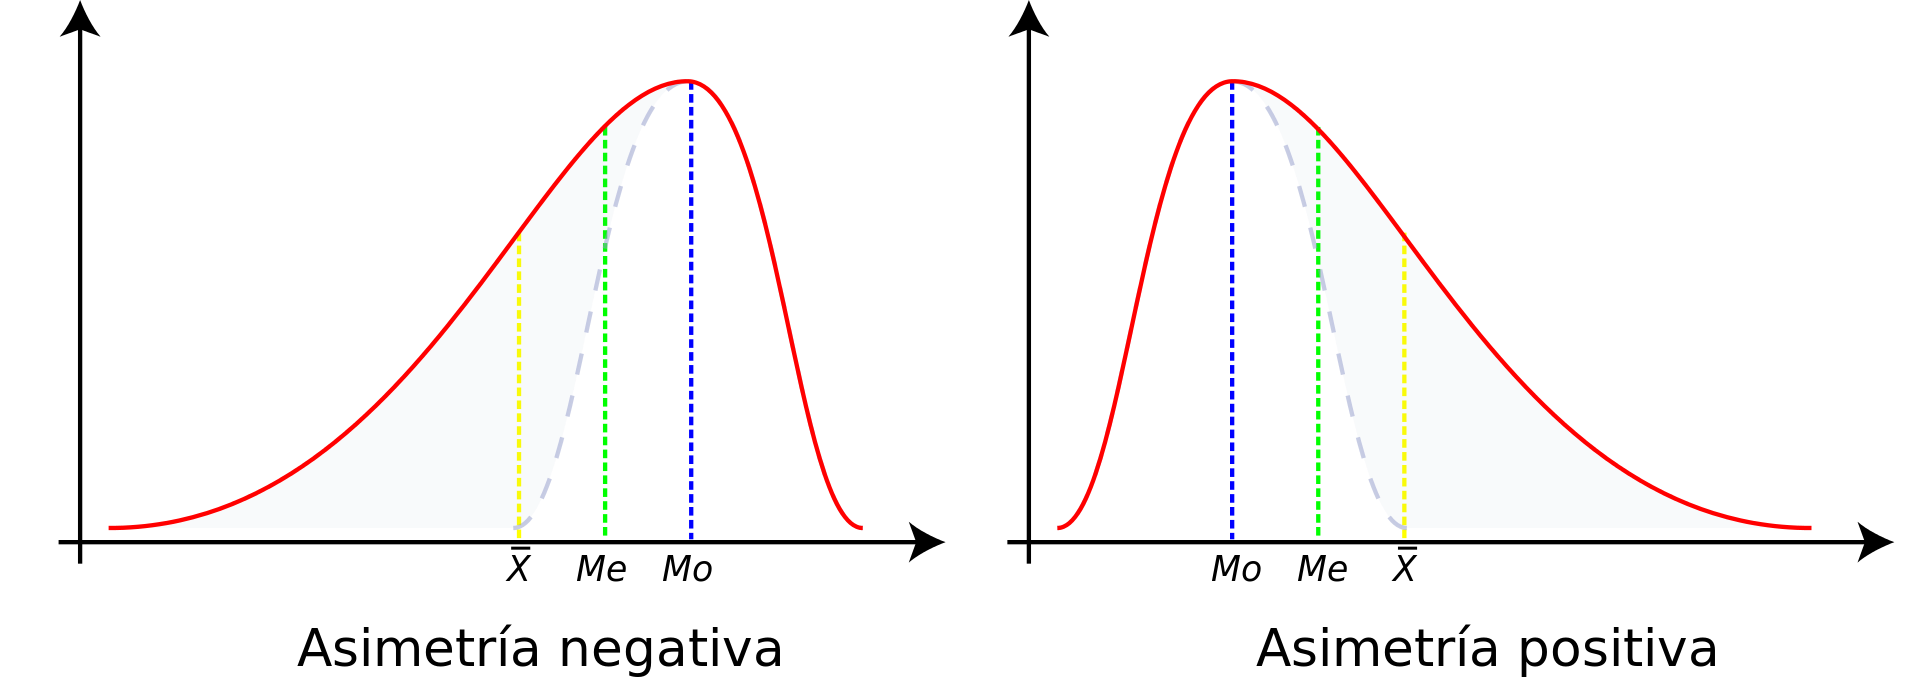

In [ ]:
data_df.skew()

norm      -0.012771
skewed     1.014394
uniform   -0.002316
peaked    -0.019652
dtype: float64

Ahora vamos a comprobar la curtosis:

In [ ]:
data_df.kurt()

norm       0.001444
skewed     1.368093
uniform   -1.195525
peaked     3.136450
dtype: float64

Los datos distribuidos normalmente tienen una curtosis cercana a cero, la distribución uniforme tiene una curtosis negativa y las dos distribuciones con más datos en las colas frente al centro tienen una curtosis más alta.



La estadística descriptiva ayudan a explorar las características de los datos, como el centro, la distribución y la forma, resumiéndolas con medidas numéricas. Ayudan a informar la dirección de un análisis y le permiten comunicar sus conocimientos a los demás de forma rápida y sucinta. Además, ciertos valores, como la media y la varianza, se utilizan en todo tipo de pruebas estadísticas y modelos predictivos.



##**¿Cómo contabilizar variables categóricas?**
Vamos a cargar el archivo AutomobileEDA.csv

In [ ]:
mtcarsEDA = pd.read_csv("AutomobileEDA.csv")

mtcarsEDA.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Por ejemplo, la variable "drive-wheels" describe la tracción de los vehiculos consignados en la tabla; son variables categóricas que representan:

1. Front Wheel Drive: Tracción delantera.</li>
2. Rear Wheel Drive: Tracción Tracera.</li>
3. Wheel Drive: Tracción de cuatro ruedas.</li>

Para contabilizar esta variable usamos el método <code>.value_counts()</code>

In [ ]:
# Para contabilizar variables categóricas:
mtcarsEDA["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

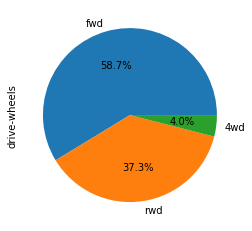

In [ ]:
mtcarsEDA["drive-wheels"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

Los box plots, o diagramas de cajas permiten comparar facilmente diferentes grupos. En este ejemplo, mediante el uso de diagramas de cajas podemos ver diferentes categorías y sus distribuciones respecto al precio. 

Vemos que, por ejemplo, que el precio de los carros de tracción trasera (rwd) son distintos a los de otras categorias, no obstante, el precio de los carros de tracción delantera y $4\times4$ son casi indistinguibles.

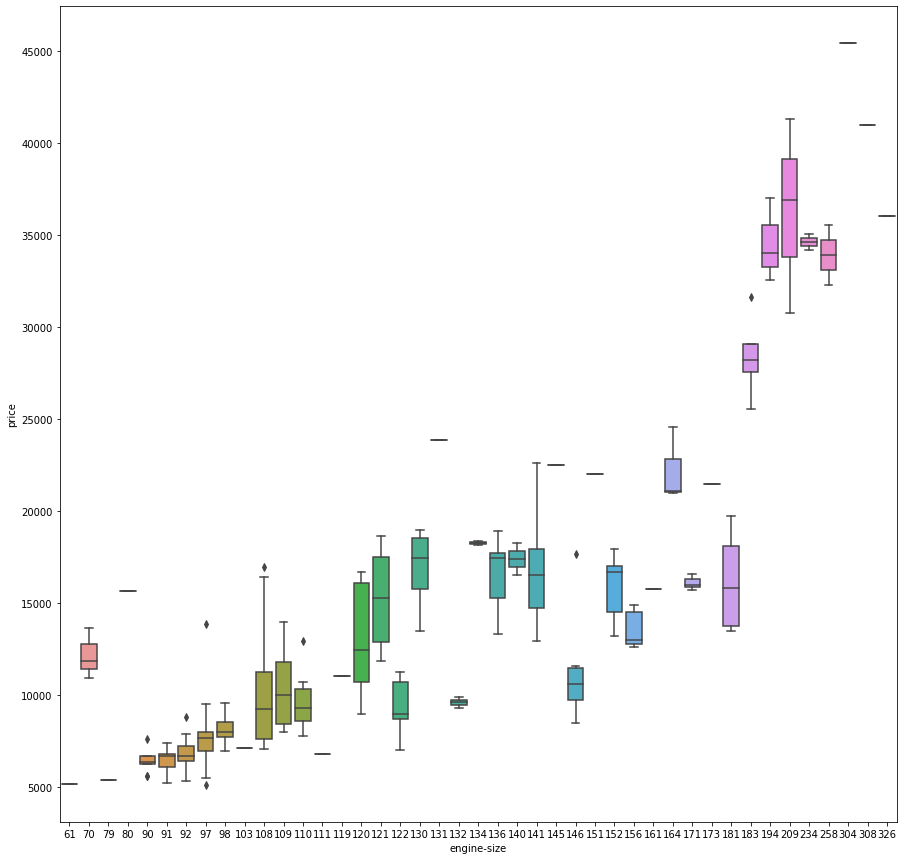

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
sns.boxplot(x="engine-size",y="price", data=mtcarsEDA)

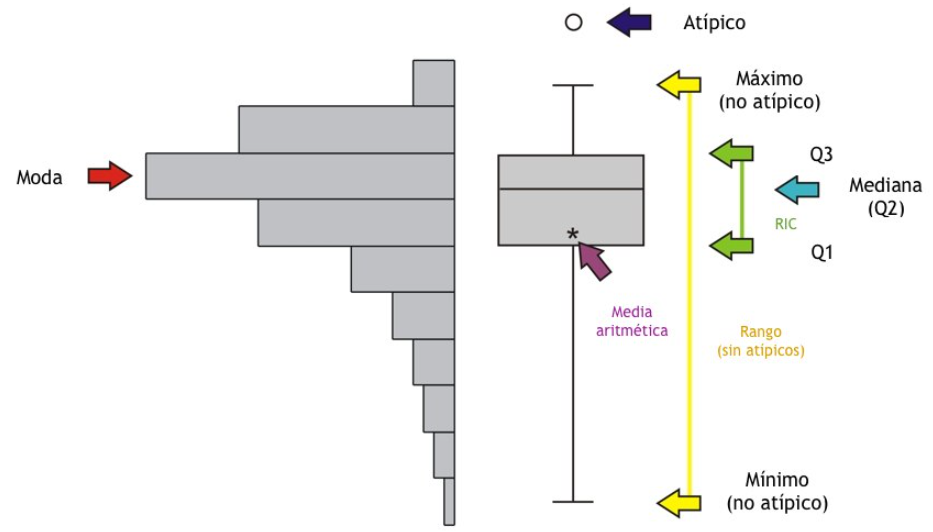

#**Correlación**
La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:



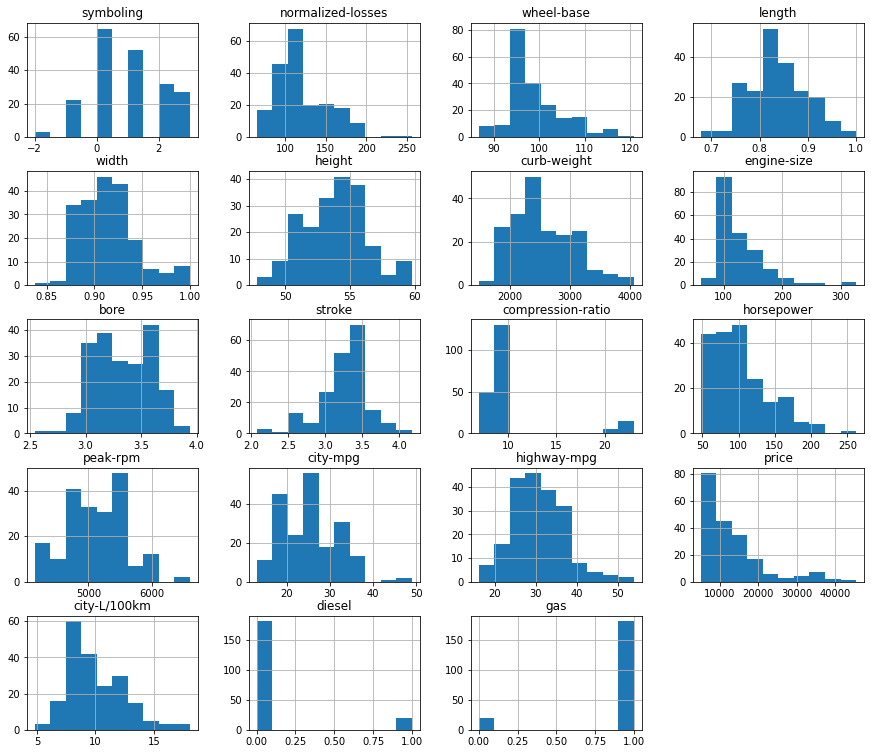

In [ ]:
mtcarsEDA.hist(figsize=(15,13))
plt.show()

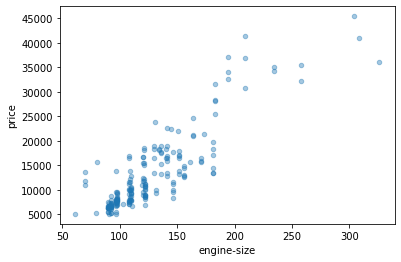

In [ ]:
# test linearity
mtcarsEDA.plot(kind="scatter", y = "price", x = "engine-size", alpha = 0.4)

Observamos que sí hay una relación lineal entre las variables. La prueba de correlación que vamos a usar es una prueba no paramétrica como la correlación de Spearman o de Kendall.


* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

*¿En qué consiste la correlación de Pearson?*

Para calcular el coeficiente de correlación podemos utilizar el método corr() de Pandas

In [ ]:
corr_p = mtcarsEDA.corr()
corr_k = mtcarsEDA.corr(method = "kendall")
corr_s = mtcarsEDA.corr(method = "spearman")

corr_p

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Veamos cómo se correlaciona el atributo precio con los demás atributos

In [ ]:
corr_p["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [ ]:
corr_k["price"].sort_values(ascending=False)

price                1.000000
curb-weight          0.744265
horsepower           0.664788
engine-size          0.661342
city-L/100km         0.661282
width                0.638911
length               0.636420
wheel-base           0.540313
bore                 0.489625
height               0.182387
normalized-losses    0.134911
diesel               0.118449
stroke               0.094153
peak-rpm            -0.048705
symboling           -0.104866
gas                 -0.118449
compression-ratio   -0.136957
highway-mpg         -0.651805
city-mpg            -0.661282
Name: price, dtype: float64

Vemos que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; y no tanto de su altura (heigth) o del tipo de combustible que utiliza. El atributo más prometedor para predecir el precio del vehículo es el tamaño del motor (Pearson) y el peso del motor (kendall).

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían $29^2=841$ gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el precio:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13ec757850>,
      dtype=object)

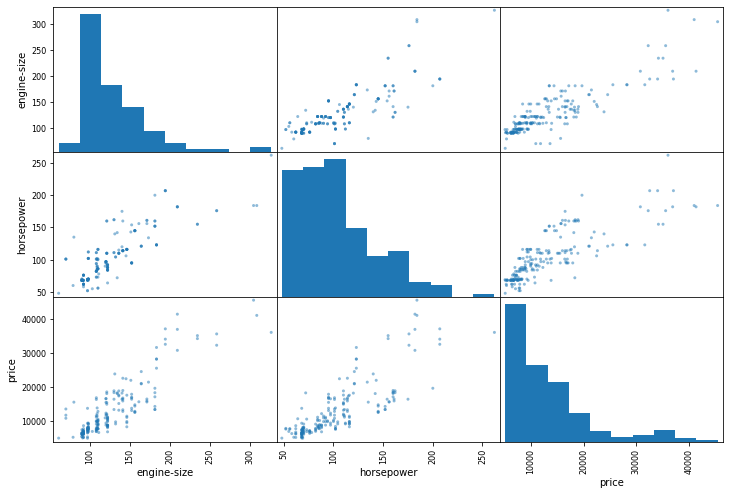

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["engine-size","horsepower","price"]

scatter_matrix(mtcarsEDA[attributes], figsize=(12, 8))

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

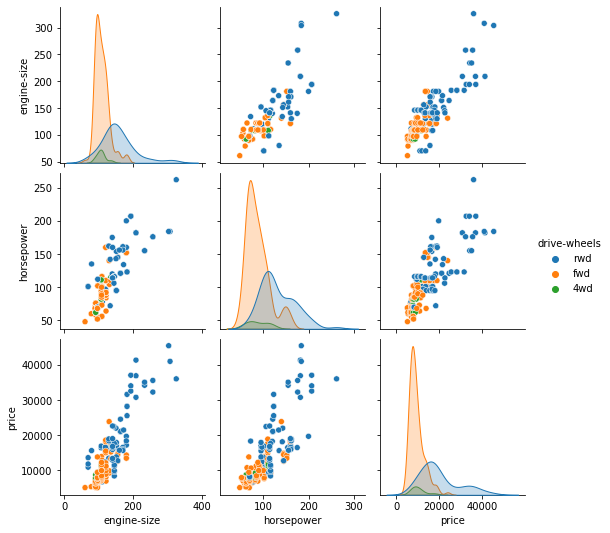

In [ ]:
sns.pairplot(mtcarsEDA, hue = "drive-wheels", vars = ["engine-size","horsepower","price"])

#**2. Distribuciones de probabilidad**

Muchas herramientas y técnicas estadísticas utilizadas en el análisis de datos se basan en la probabilidad de que ocurra un evento, la cual está en una escala de 0 (el evento nunca ocurre) a 1 (el evento siempre ocurre). Cuando se trabaja con datos, las variables en las columnas del conjunto de datos pueden considerarse como variables aleatorias. Una distribución de probabilidad describe cómo se distribuye una variable aleatoria; nos dice qué valores es más probable que tome una variable aleatoria y qué valores es menos probable.

En estadística, hay una variedad de distribuciones de probabilidad definidas con precisión que tienen diferentes formas y se pueden usar para modelar diferentes tipos de eventos aleatorios, como vimos en la unidad anterior.

##**Distribución Uniforme**
La distribución uniforme es una distribución de probabilidad en la que cada valor dentro de un cierto rango tiene la misma probabilidad de ocurrir y los valores fuera del rango nunca ocurren. Si hacemos un gráfico de densidad de una distribución uniforme, parece plano porque ningún valor es más probable que otro.

Muchas funciones útiles para trabajar con distribuciones de probabilidad en Python están contenidas en la biblioteca `scipy.stats`. Vamos a cargar algunas bibliotecas, generemos algunos datos uniformes y tracemos una curva de densidad:

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
uniform_data = stats.uniform.rvs(size=100000,  # Genera 100000 números
                                 loc = 0,      # desde 0 
                                 scale=10)     # hasta 10

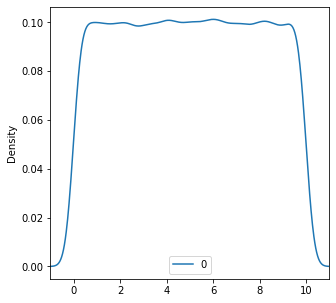

In [ ]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot 
                               figsize=(5,5),
                               xlim=(-1,11));

Nota: el gráfico anterior es una aproximación de la distribución subyacente, ya que se basa en una muestra de observaciones.

En el código anterior, generamos 100 000 puntos de datos a partir de una distribución uniforme que abarca el rango de 0 a 10. En el gráfico de densidad, vemos que la densidad de nuestros datos uniformes es esencialmente nivelada, lo que significa que cualquier valor dado tiene la misma probabilidad de ocurrir. El área bajo una curva de densidad de probabilidad siempre es igual a 1.

Las distribuciones de probabilidad en `scipy` vienen con varias funciones útiles para generar datos aleatorios y extraer valores de interés:

* `stats.distribution.rvs()` genera números aleatorios a partir de la distribución especificada. Los argumentos de rvs() variarán según el tipo de distribución con la que esté trabajando; en el caso de la distribución uniforme, tenemos que especificar los puntos inicial y final y el tamaño (número de puntos aleatorios a generar).

* `stats.distribution.cdf() `se utiliza para determinar la probabilidad de que una observación extraída de una distribución caiga por debajo de un valor específico (conocido como función de distribución acumulativa). En esencia, `cdf()` te da el área bajo la curva de densidad de la distribución a la izquierda de cierto valor en el eje x. Por ejemplo, en la distribución uniforme anterior, hay un 25 % de probabilidad de que una observación esté en el rango de 0 a 2,5 y un 75 % de probabilidad de que caiga en el rango de 2.5 a 10. Podemos confirmar esto con `cdf()`:

In [ ]:
stats.uniform.cdf(x=2.5,         # Valor de corte (cuantil) para comprobar
                  loc=0,         # Inicio de la distribución
                  scale=10)      # Final de la distribución

0.25

* stats.distribution.ppf() es el inverso de cdf(): devuelve el valor de corte del eje x (cuantil) asociado con una probabilidad determinada. Por ejemplo, si queremos saber el valor de corte para el cual tenemos un 40 % de posibilidades de obtener una observación por debajo de ese valor, podemos usar ppf():

In [ ]:
stats.uniform.ppf(q=0.4,         # Corte
                  loc=0,         # Inicio de la distribución
                  scale=10)      # Final de la distribución

4.0

* stats.distribution.pdf() le da la densidad de probabilidad (altura de la distribución) en un valor x dado. Dado que la distribución uniforme es plana, todos los valores de x dentro de su rango tendrán la misma densidad de probabilidad y los valores de x fuera del rango tendrán una densidad de probabilidad de 0: 

In [ ]:
for x in range(-1,12,3):
    print("Densidad en un valor de x " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )  

Densidad en un valor de x -1
0.0
Densidad en un valor de x 2
0.1
Densidad en un valor de x 5
0.1
Densidad en un valor de x 8
0.1
Densidad en un valor de x 11
0.0


##**Generando números aleatorios y configurando la semilla**
Cuando necesite generar números reales aleatorios en un rango con la misma probabilidad, puede extraer números de una distribución uniforme usando `stats.distribution.rvs()`. Como vimos en la unidad anterior, Python también viene con una biblioteca llamada "random" que le permite realizar varias operaciones que involucran números aleatorios. 


In [ ]:
import random

random.randint(0,10)     # Obtiene un número entero aleatorio en el rango especificado

1

In [ ]:
random.choice([2,4,6,9]) # Obtiene un elemento aleatorio de una secuencia

2

In [ ]:
random.random()          # Obtiene un númerpo entre 0 y 1

0.014628443289970372

In [ ]:
random.uniform(0,10)     # Obtiene un número entre 0 y 1

4.424809383257547

Independientemente del método que utilice para generar números aleatorios, el resultado de un proceso aleatorio puede diferir de una ejecución a la siguiente. A menudo, no es deseable que los resultados varíen cada vez que ejecuta una función. Por ejemplo, si desea que un colega pueda reproducir sus resultados exactamente, puede tener problemas cuando utiliza la aleatorización. Puede asegurarse de que sus resultados sean los mismos cada vez que use una función que implique aleatoriedad configurando el valor inicial del generador de números aleatorios para inicializarlo antes de ejecutar la función. Establezca la semilla aleatoria con `random.seed()`:

In [ ]:
print([random.uniform(0,10) for x in range(4)]) # Establece la semilla en un valor arbitrario

random.seed(12)  # Establece la semilla en el mismo valor

print([random.uniform(0,10) for x in range(4)])

[8.137967223037041, 1.8455711184419532, 1.1316556491406493, 7.356929058697379]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


En el primer caso, como no establecimos una semilla, obtenemos números diferentes cada vez que ejecutamos el código.
En el segundo caso, generamos exactamente los mismos números porque configuramos la misma semilla antes de cada llamada. Esta reproducibilidad ilustra el hecho de que estos números aleatorios no son verdaderamente aleatorios, sino más bien "*pseudoaleatorios*".

Muchas funciones en las bibliotecas de Python que usan aleatoriedad tienen un argumento de semilla aleatorio opcional incorporado para que no tenga que establecer la semilla fuera de la función. Por ejemplo, la función `rvs()` tiene un argumento opcional random_state, que le permite establecer la semilla.

Nota: La biblioteca estándar de Python "random" tiene una semilla interna separada de la biblioteca numpy. Cuando usamos funciones de numpy y bibliotecas creadas sobre numpy (pandas, scipy, scikit-learn), `usamos np.random.seed()` para establecer la semilla.

##**Distribución normal**
La distribución normal o gaussiana es una distribución de probabilidad continua caracterizada por una curva simétrica en forma de campana. Una distribución normal se define por su centro (media) y dispersión (desviación estándar). La mayor parte de las observaciones generadas a partir de una distribución normal se encuentran cerca de la media, que se encuentra en el centro exacto de la distribución: como regla general, alrededor del 68 % de los datos se encuentran dentro de una desviación estándar de la media, el 95 % se encuentra dentro de 2 desviaciones estándar y el 99,7 % se encuentra dentro de 3 desviaciones estándar.

La distribución normal es quizás la distribución más importante de todas las estadísticas. Resulta que muchos fenómenos del mundo real, como los puntajes de las pruebas de coeficiente intelectual y las alturas humanas, siguen aproximadamente una distribución normal, por lo que a menudo se usa para modelar variables aleatorias. Muchas pruebas estadísticas comunes asumen que las distribuciones son normales.

In [ ]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


El resultado muestra que aproximadamente el 16 % de los datos generados por una distribución normal con media 0 y desviación estándar 1 está por debajo de -1, el 16 % está por encima de 1 y el 68 % se encuentra entre -1 y 1, lo que concuerda con la regla de 68, 95 y 99.7. Tracemos la distribución normal e inspeccionemos las áreas que calculamos:

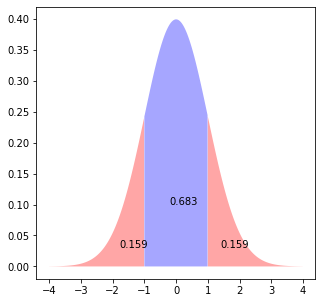

In [ ]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (5,5)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

El gráfico anterior muestra la forma de campana de la distribución normal, el área por debajo y por encima de una desviación estándar y el área dentro de una desviación estándar de la media. Encontrar cuantiles de la distribución normal es una tarea común cuando se realizan pruebas estadísticas. Puede comprobar los cuantiles de distribución normal con stats.norm.ppf():

In [ ]:
print( stats.norm.ppf(q=0.025) ) # Encuentre el cuantil para un corte del 2.5 %

print( stats.norm.ppf(q=0.975) ) # Encuentre el cuantil para el límite del 97.5 %

-1.9599639845400545
1.959963984540054


El resultado del cuantil anterior confirma que aproximadamente el 5 % de los datos se encuentran a más de 2 desviaciones estándar de la media.


#**Distribución binomial**
La distribución binomial es una distribución de probabilidad discreta que modela los resultados de una secuencia de números aleatorios de algún experimento o evento. Esta distribución se define por dos parámetros: la probabilidad de éxito en cualquier intento y el número de intentos. La distribución binomial indica qué tan probable es lograr un número dado de éxitos en n intentos del experimento. Por ejemplo, podríamos modelar el lanzamiento de una moneda al aire 10 veces con una distribución binomial donde el número de intentos se establece en 10 y la probabilidad de éxito se establece en 0,5. En este caso, la distribución nos diría qué tan probable es obtener cero caras, 1 cara, 2 caras y así sucesivamente.

El nombre de Scipy para el binomio es binom. Generemos e investiguemos algunos datos que sigan una distribucipon binomial:

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   6  88  446  1194  2000  2472  2065  1202  416  98  13


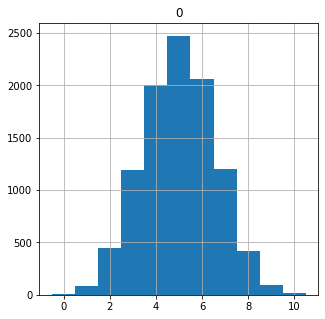

In [ ]:
fair_coin_flips = stats.binom.rvs(n=10,        # Número de lanzamientos por ensayo
                                  p=0.5,       # Probabilidad de éxito
                                  size=10000)  # Número de ensayos

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Tenga en cuenta que dado que la distribución binomial es discreta, solo toma valores enteros, por lo que podemos resumir los datos binomiales con una tabla de frecuencia y su distribución con un histograma. El histograma nos muestra que una distribución binomial con un 50 % de probabilidad de éxito es aproximadamente simétrica, con los resultados más probables en el centro. Esto recuerda a la distribución normal, pero si alteramos la probabilidad de éxito, la distribución no será simétrica:

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1  10  37  278  872  2001  3033  2672  1096


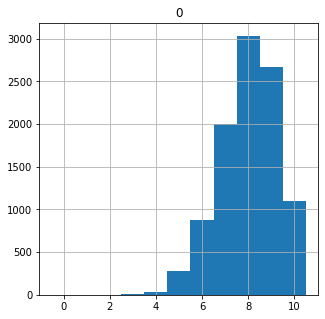

In [ ]:
biased_coin_flips = stats.binom.rvs(n=10,      # número de lanzamientos por ensayo
                                  p=0.8,       # probabilidad de éxito
                                  size=10000)  # Número de ensayos

# Tabla de conteos
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Histograma
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

La función `cdf()` nos permite verificar la probabilidad de lograr una cantidad de éxitos dentro de un cierto rango:

In [ ]:
stats.binom.cdf(k=5,        # Probabilidad de k = 5 éxitos o menos
                n=10,       # con 10 lanzamientos
                p=0.8)      # y probabilidad de éxito de 0.8

0.032793497599999964

In [ ]:
1 - stats.binom.cdf(k=8,        # Probabilidad de k = 5 éxitos o mas
                    n=10,       # con 10 lanzamientos
                    p=0.8)      # y probabilidad de éxito de 0.8

0.37580963840000003

Para funciones de densidad de probabilidad continuas, utiliza `pdf()` para verificar la densidad de probabilidad en un valor x dado. Para distribuciones discretas como la binomial, use `stats.distribution.pmf()` (función de masa de probabilidad) para verificar la masa (proporción de observaciones) en un número dado de éxitos k:

In [ ]:
stats.binom.pmf(k=5,        # Probabilidad de k = 5 éxitos
                n=10,       # con 10 lanzamientos
                p=0.5)      # And success probability 0.5

0.24609375000000025

In [ ]:
stats.binom.pmf(k=8,        # Probabilidad de k = 8 éxitos
                n=10,       # con 10 lanzamientos
                p=0.8)      # y probabilidad de éxito de 0.8

0.301989888

##**Distribuciones Geométrica y Exponencial**
Las distribuciones geométrica y exponencial modelan el tiempo que tarda en ocurrir un evento. La distribución geométrica es discreta y modela el número de intentos necesarios para lograr un éxito en experimentos repetidos con una probabilidad de éxito determinada. La distribución exponencial es un análogo continuo de la distribución geométrica y modela la cantidad de tiempo que debe esperar antes de que ocurra un evento dada una determinada tasa de ocurrencia.

El apodo de Scipy para la distribución geométrica es "geom". Usemos las funciones geom para modelar el número de intentos necesarios para obtener un éxito (cara) al lanzar una moneda:

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13
row_0                                                              
counts  5099  2490  1185  593  304  162  92  39  15  12   3   4   2


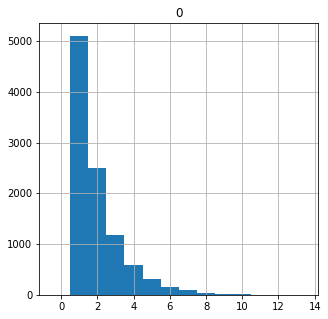

In [ ]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # generar datos que siguen una distribución geométrica
                                  p=0.5)       # con una probabilidad de éxito de 0.5

# Tabla de conteos 
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Histograma
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

La distribución es similar a lo que esperaríamos: es muy probable que obtenga cara en 1 o 2 lanzamientos, mientras que es muy poco probable que se necesiten más de 5 lanzamientos para obtener cara. En los 10 000 ensayos que generamos, cuando más se tardó en obtener cara fue de 13 lanzamientos.

Usemos cdf() para verificar la probabilidad de necesitar 6 lanzamientos o más para tener éxito:

In [ ]:
first_five = stats.geom.cdf(k=5,   # Probabilidad de éxito en los primeros 5 lanzamientos
                           p=0.5)

1 - first_five

0.03125

Use pmf() para verificar la probabilidad de ver un número específico de lanzamientos antes de que un éxito:

In [ ]:
stats.geom.pmf(k=2,   # Probabilidad de necesitar exactamente 2 lanzamientos para obtener el primer éxito
              p=0.5)

0.25

Ahora investiguemos la distribución exponencial:

In [ ]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

Nota: El tiempo promedio de llegada para la distribución exponencial es igual a 1/arrival_rate.

Tracemos esta distribución exponencial para tener una idea de su forma:

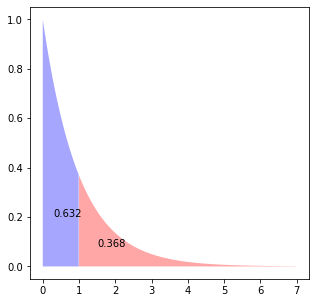

In [ ]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

Similar a la distribución geométrica, la exponencial comienza alta y tiene una cola larga que se va a la derecha y contiene casos raros en los que tiene que esperar mucho más que el promedio para llegar.

##**Distribución de Poisson**
La distribución de Poisson modela la probabilidad de ver una cierta cantidad de éxitos dentro de un intervalo de tiempo, donde el tiempo que lleva el siguiente éxito se modela mediante una distribución exponencial. La distribución de Poisson se puede usar para modelar el tráfico, como la cantidad de llegadas que un hospital puede esperar en una hora o la cantidad de correos electrónicos que esperaría recibir en una semana.

El nombre de Scipy para la distribución de Poisson es "poisson". Generemos y representemos algunos datos de una distribución de Poisson con una tasa de llegada de 1 por unidad de tiempo:

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3665  3698  1860  588  149  33  6  1


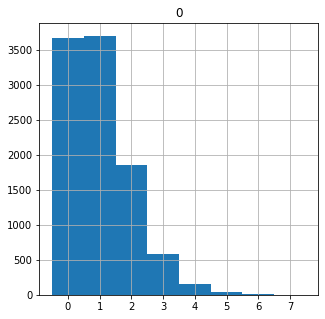

In [ ]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Genera datos que siguen una distribución de Poisson
                                   mu=1 )       # media de llegadas

# Tabla de conteos
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Histograma
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

El histograma muestra que cuando las llegadas son relativamente poco frecuentes, es raro ver más de un par de llegadas en cada período de tiempo. Cuando la tasa de llegadas es alta, se vuelve cada vez más raro ver un número bajo de llegadas y la distribución comienza a verse más simétrica:

col_0   1   2   3    4    5    6    7     8     9     10  ...   15   16   17  \
row_0                                                     ...                  
counts   5  27  94  227  381  623  902  1142  1244  1307  ...  346  198  125   

col_0   18  19  20  21  22  23  27  
row_0                               
counts  75  37  18   5   3   2   1  

[1 rows x 24 columns]


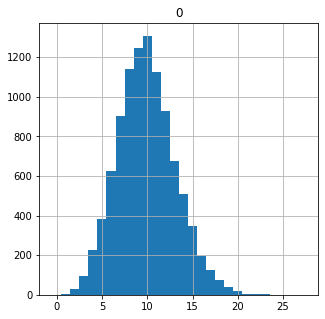

In [ ]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # promedio de llegadas :10

# Tabla de conteos
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Histograma
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

Al igual que con otras distribuciones de probabilidad discretas, podemos usar cdf() para verificar la probabilidad de lograr más o menos de un cierto número de éxitos y pmf() para verificar la probabilidad de obtener un número específico de éxitos:

In [ ]:
stats.poisson.cdf(k=5,     # Compruebe la probabilidad de 5 llegadas o menos
                  mu=10)   # Con tasa de llegada 10

0.06708596287903189

In [ ]:
stats.poisson.pmf(k=10,     # Compruebe la probabilidad de 10 llegadas exactamente
                  mu=10)    # Con tasa de llegada 10

0.12511003572113372

Las funciones de distribución de probabilidad son útiles para generar datos aleatorios, modelar eventos aleatorios y ayudar con pruebas y análisis estadísticos.


#**3. Intervalos de confianza**

Hasta el momento, nos hemos centrado en las funciones y la sintaxis necesarias para manipular, explorar y describir datos. La limpieza de datos y el análisis exploratorio suelen ser pasos preliminares hacia el objetivo final de extraer información de los datos a través de la inferencia estadística o el modelado predictivo. La idea es utilizar métodos para analizar datos y herramientas para realizar análisis en Python.

La inferencia estadística es el proceso de analizar datos de una muestra para obtener información sobre la población de la que se recopilaron los datos e investigar las diferencias entre las muestras de datos. En el análisis de datos, a menudo nos interesan las características de una gran población, pero la recopilación de datos sobre toda la población puede ser inviable. Por ejemplo, antes de las elecciones presidenciales, podría ser muy útil conocer las inclinaciones políticas de cada votante elegible, pero encuestar a todos los votantes no es factible. En su lugar, podríamos encuestar a algún subconjunto de la población, como mil votantes registrados, y usar esos datos para hacer inferencias sobre la población en su conjunto.


##**Estimaciones puntuales**
Las estimaciones puntuales son estimaciones de parámetros de una población basadas en datos de una muestra. Por ejemplo, si quisiéramos saber la edad promedio de los votantes registrados para las próximas elecciones presidenciales, podríamos realizar una encuesta de votantes registrados y luego usar la edad promedio de los encuestados como una estimación puntual de la edad promedio de la población en general. El promedio de una muestra se conoce como media muestral.

La media muestral no suele ser exactamente igual a la media poblacional. Esta diferencia puede deberse a muchos factores, incluido el diseño deficiente de la encuesta, los métodos de muestreo sesgados y la aleatoriedad inherente a la extracción de una muestra de una población. Investiguemos las estimaciones puntuales generando una población de datos de edad aleatorios y luego extrayendo una muestra para estimar la media:

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [ ]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean() #Imprime la media de la población

43.002372

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages, size=500)      

print ( sample_ages.mean() )                         # Imprime la media

population_ages.mean() - sample_ages.mean()   # Comprueba la diferencia entre medias

42.388


0.614372000000003

Nuestra estimación puntual basada en una muestra de 500 individuos subestima la verdadera media de la población en 0.6 años, pero está cerca. Esto ilustra un punto importante: podemos obtener una estimación bastante precisa de una población grande muestreando un subconjunto relativamente pequeño de individuos.

Otra estimación puntual que puede ser de interés es la proporción de la población que pertenece a alguna categoría o subgrupo. Por ejemplo, nos gustaría saber la raza de cada votante que encuestamos, para tener una idea de la demografía general de la base de votantes. Puede hacer una estimación puntual de este tipo de proporción tomando una muestra y luego verificando la proporción en la muestra:

In [ ]:
random.seed(10)
population_races = (["Blanco"]*100000) + (["Negro"]*50000) + (["Hispano"]*50000) + (["Asiático"]*25000) + (["Otro"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Muestra con 1000 valores

for race in set(demo_sample):
    print( race + " proporción estimada:" )
    print( demo_sample.count(race)/1000 )


Asiático proporción estimada:
0.099
Otro proporción estimada:
0.099
Blanco proporción estimada:
0.379
Hispano proporción estimada:
0.192
Negro proporción estimada:
0.231


Observe que las estimaciones de la proporción de la población están cerca de las verdaderas proporciones de la población subyacente.

##**Intervalos de confianza**
Una estimación puntual puede darle una idea aproximada de un parámetro de población como la media, pero las estimaciones son propensas a errores y puede que no sea factible tomar varias muestras para obtener estimaciones mejoradas. *Un intervalo de confianza es un rango de valores por encima y por debajo de una estimación puntual que captura el verdadero parámetro de la población en algún nivel de confianza predeterminado*. Por ejemplo, si desea tener un 95 % de posibilidades de capturar el parámetro de población real con una estimación puntual y un intervalo de confianza correspondiente, establecería su nivel de confianza en 95 %. Los niveles de confianza más altos dan como resultado intervalos de confianza más amplios.

Calcule un intervalo de confianza tomando una estimación puntual y luego sumando y restando un margen de error para crear un rango. El margen de error se basa en el nivel de confianza deseado, la dispersión de los datos y el tamaño de la muestra. La forma en que calcula el margen de error depende de si conoce o no la desviación estándar de la población.

Si conoce la desviación estándar de la población, el margen de error es igual a:

$$z*\frac{\sigma}{\sqrt{n}}$$
 
Donde $\sigma$ es la desviación estándar de la población, n es el tamaño de la muestra y z es un número conocido como *valor crítico z*. El valor crítico z es el número de desviaciones estándar que tendría que pasar de la media de la distribución normal para capturar la proporción de los datos asociados con el nivel de confianza deseado. Por ejemplo, sabemos que aproximadamente el 95 % de los datos en una distribución normal se encuentran dentro de 2 desviaciones estándar de la media, por lo que podríamos usar 2 como el valor crítico z para un intervalo de confianza del 95 % (aunque es más exacto obtener los valores críticos z con `stats.norm.ppf()`.).

Calculemos una confianza del 95 % para nuestra estimación puntual media:


In [ ]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.70306406882683, 43.34293593117317)


Nota: Usamos `stats.norm.ppf(q = 0.975)` para obtener el valor crítico z deseado en lugar de q = 0.95 porque la distribución tiene dos colas.

Observe que el intervalo de confianza que calculamos captura la verdadera media poblacional de 43.0023.

Vamos a crear varios intervalos de confianza y trazarlos para tener una mejor idea de lo que significa "capturar" la verdadera media:

In [ ]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

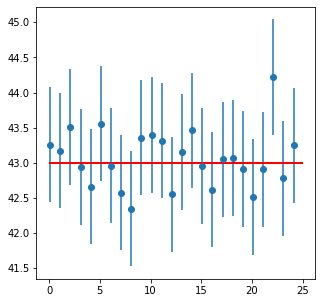

In [ ]:
plt.figure(figsize=(5,5))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red");

Observe que en el gráfico anterior, todos menos uno de los intervalos de confianza del 95 % se superponen a la línea roja que marca la media verdadera. Esto es de esperar: dado que un intervalo de confianza del 95 % captura la media real el 95 % de las veces, esperaríamos que nuestro intervalo pierda la media real el 5 % de las veces.

Si no conoce la desviación estándar de la población, debe usar la desviación estándar de su muestra como sustituto al crear intervalos de confianza. Dado que la desviación estándar de la muestra puede no coincidir con el parámetro de la población, el intervalo tendrá más error cuando no conozca la desviación estándar de la población. Para dar cuenta de este error, usamos lo que se conoce como valor *t-crítico t* en lugar del valor crítico z. El valor t-crítico se extrae de lo que se conoce como distribución t, una distribución que se parece mucho a la distribución normal pero que se hace más y más ancha a medida que disminuye el tamaño de la muestra. La distribución t está disponible en scipy.stats con el apodo "t" para que podamos obtener valores críticos t con `stats.t.ppf()`.

Tomemos una muestra nueva y más pequeña y luego creemos un intervalo de confianza sin la desviación estándar de la población, usando la distribución t:

In [ ]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


Nota: al usar la distribución t, debe proporcionar los grados de libertad (df). Para este tipo de prueba, los grados de libertad son iguales al tamaño de la muestra menos 1. Si tiene un tamaño de muestra grande, la distribución t se aproxima a la distribución normal.

Observe que el valor crítico t es mayor que el valor crítico z que usamos para el intervalo de confianza del 95 %. Esto permite que el intervalo de confianza arroje una red más grande para compensar la variabilidad causada por el uso de la desviación estándar de la muestra en lugar de la desviación estándar de la población. El resultado final es un intervalo de confianza mucho más amplio (un intervalo con un mayor margen de error).

Si tiene una muestra grande, el valor crítico t se acercará al valor crítico z, por lo que hay poca diferencia entre usar la distribución normal y la distribución t:

In [ ]:
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

En lugar de calcular a mano un intervalo de confianza para una estimación puntual media, puede calcularlo utilizando la función de Python stats.t.interval():

In [ ]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma) 

(37.65147508161371, 48.108524918386294)

También podemos hacer un intervalo de confianza para una estimación puntual de una proporción de la población. En este caso, el margen de error es igual a:

$$z*\sqrt{\frac{p(1-p)}{n}}$$
 
Donde $z$ es el valor crítico z para nuestro nivel de confianza, p es la estimación puntual de la proporción de la población y n es el tamaño de la muestra. Calculemos un intervalo de confianza del 95 % para los hispanos según la proporción muestral que calculamos anteriormente (0.192):

In [ ]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of proportion

n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.16758794241348748, 0.21641205758651252)

El resultado muestra que el intervalo de confianza capturó el parámetro de población real de 0.2. Similar a nuestras estimaciones puntuales de la media de la población, podemos usar la función scipy stats.distribution.interval() para calcular un intervalo de confianza para una proporción de la población para nosotros. En este caso, estamos trabajando con valores críticos z, por lo que queremos trabajar con la distribución normal en lugar de la distribución t:

In [ ]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)

Estimar los parámetros de la población a través del muestreo es una forma de inferencia simple pero poderosa. Las estimaciones puntuales combinadas con márgenes de error nos permiten crear intervalos de confianza que capturan el parámetro de población real con alta probabilidad.

Para practicar, siga este enlace [Datasets for Teaching](https://www.sheffield.ac.uk/mash/statistics/datasets)

[1] Peter Bruce and Andrew Bruce (2017). Practical Statistics for Data Scientists. 50 Essential Concepts. y O’Reilly Media, Inc.

[2] https://www.kaggle.com/hamelg/python-for-data-analysis-index

[3] https://github.com/diplomado-bigdata-machinelearning-udea/Curso1/blob/master/s05/s05.ipynb
